In [1]:
!pip3 install -e .. -U

Obtaining file:///Users/adam/Desktop/Capfolio/tensortrade
  Found existing installation: TensorTrade 0.1.0rc0
    Uninstalling TensorTrade-0.1.0rc0:
      Successfully uninstalled TensorTrade-0.1.0rc0
  Running setup.py develop for tensortrade


In [2]:
%matplotlib inline

import pandas as pd

from stable_baselines.common.policies import MlpLnLstmPolicy
from stable_baselines import PPO2

from tensortrade.rewards import SimpleProfit
from tensortrade.actions import DiscreteActions
from tensortrade.features.stationarity import FractionalDifference
from tensortrade.features.scalers import MinMaxNormalizer
from tensortrade.features import FeaturePipeline

normalize = MinMaxNormalizer(inplace=True)
difference = FractionalDifference(difference_order=0.6,
                                  inplace=True)
feature_pipeline = FeaturePipeline(steps=[normalize, difference])

reward_scheme = SimpleProfit()
action_scheme = DiscreteActions(n_actions=20, instrument='ETH/BTC')

ohlcv_data = pd.read_csv('./data/Coinbase_BTCUSD_1h.csv', skiprows=1)
ohlcv_data = ohlcv_data[['open','high','low','close','volume']]

model = PPO2
policy = MlpLnLstmPolicy
params = { "learning_rate": 1e-5, 'nminibatches': 1 }

In [3]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import StableBaselinesTradingStrategy
from tensortrade.exchanges.simulated import FBMExchange

WINDOW_SIZE = 1

exchange = FBMExchange(base_instrument='BTC',
                       timeframe='1h',
                       window_size=WINDOW_SIZE,
                       pretransform=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

performance = strategy.run(steps=1665)

performance[-5:]

5 1
(5,)
(5,)
Finished running strategy.
Total episodes: 1 (1665 timesteps).
Average reward: -32.86919247739314.


,balance,net_worth
1118,108813.770199,134458.549870
1119,28579.773723,133000.862954
1120,381.026356,130901.318324
1121,92.660971,136266.343675
1122,46.113537,133112.165336


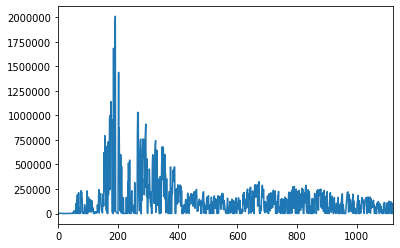

In [4]:
performance.balance.plot()

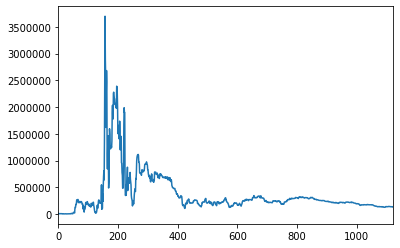

In [5]:
performance.net_worth.plot()

In [7]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import StableBaselinesTradingStrategy
from tensortrade.exchanges.simulated import SimulatedExchange

exchange = SimulatedExchange(base_instrument='USD',
                             data_frame=ohlcv_data,
                             price_column='close',
                             window_size=WINDOW_SIZE,
                             pretransform=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

performance = strategy.run(steps=1665)

performance[-5:]

5 1
(5,)
(5,)
Finished running strategy.
Total episodes: 0 (1665 timesteps).
Average reward: -1.67937518058291.


,balance,net_worth
1128,-3.142253,672.005389
1129,495.512145,664.867840
1130,252.341500,664.962399
1131,190.319851,663.778094
1132,48.271748,664.728893


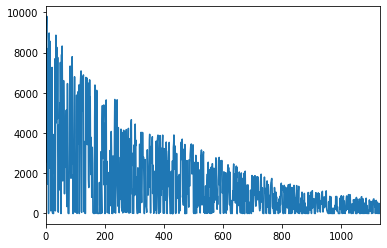

In [8]:
performance.balance.plot()

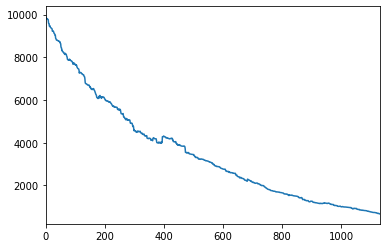

In [9]:
performance.net_worth.plot()

In [10]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import StableBaselinesTradingStrategy
from tensortrade.exchanges.simulated import FBMExchange

WINDOW_SIZE = 20

exchange = FBMExchange(base_instrument='BTC',
                       timeframe='1h',
                       window_size=WINDOW_SIZE,
                       pretransform=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

performance = strategy.run(steps=1665)

performance[-5:]

5 20
(20, 5)
(20, 5)
Finished running strategy.
Total episodes: 1 (1665 timesteps).
Average reward: -1.9749117901539603.


,balance,net_worth
1125,17.988377,1247.889698
1126,13.529201,1157.305702
1127,3.553418,1299.284927
1128,0.866403,1424.630021
1129,0.014690,1376.455720


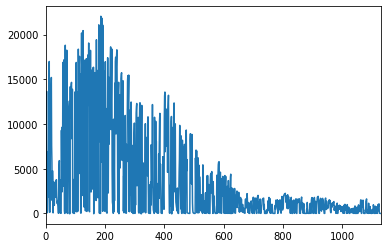

In [11]:
performance.balance.plot()

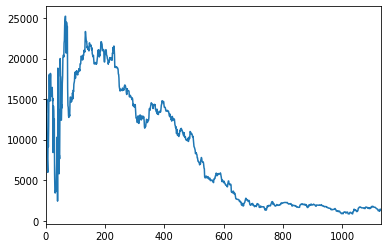

In [12]:
performance.net_worth.plot()

In [13]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import StableBaselinesTradingStrategy
from tensortrade.exchanges.simulated import SimulatedExchange

WINDOW_SIZE = 20

exchange = SimulatedExchange(base_instrument='USD',
                             data_frame=ohlcv_data,
                             price_column='close',
                             window_size=WINDOW_SIZE,
                             pretransform=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

performance = strategy.run(steps=1665)

performance[-5:]

5 20
(20, 5)
(20, 5)
Finished running strategy.
Total episodes: 0 (1665 timesteps).
Average reward: -1.5838337217509488.


,balance,net_worth
1121,85.738669,435.311769
1122,21.980809,433.986105
1123,10.888181,435.384760
1124,218.819849,430.554298
1125,110.904600,431.262282


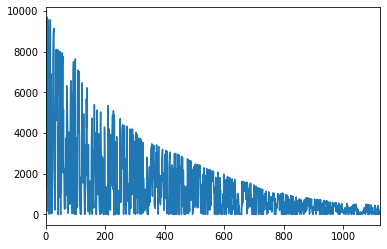

In [14]:
performance.balance.plot()

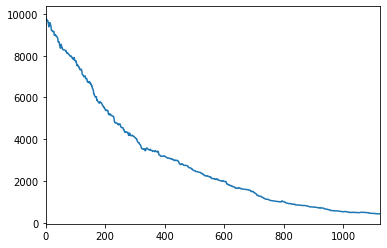

In [15]:
performance.net_worth.plot()

In [17]:
strategy.save_agent('agents/PPO_BTC_1h')